In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [5]:
x_train, x_test = train_test_split(x,test_size=0.2,random_state=1)

In [6]:
wcss = []
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    prediction = km.fit_predict(x_train)
    
    wcss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(x_train,prediction))


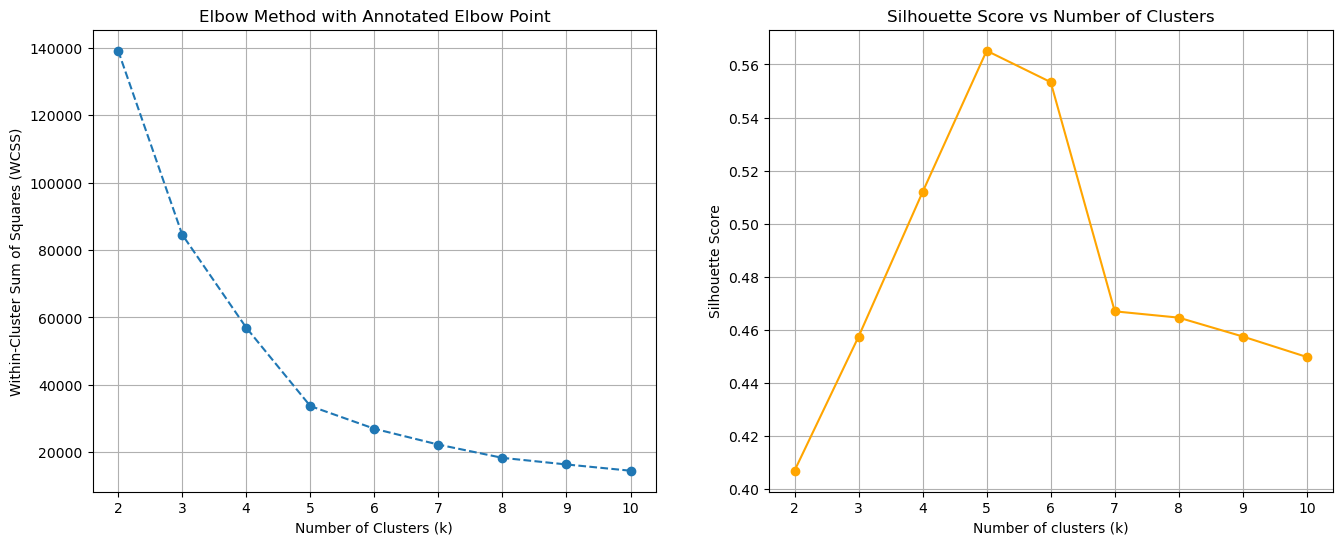

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

xrange = range(2,11)
ax1.plot(xrange,wcss,marker='o',linestyle='--')
ax1.set_title('Elbow Method with Annotated Elbow Point')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.grid(True)

xrange = range(2,11)
ax2.plot(xrange, silhouette_scores, marker='o', color='orange')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

In [8]:
kmeans = KMeans(n_clusters=5)
prediction = kmeans.fit_predict(x)


In [9]:
df['KMeans_Cluster'] = prediction
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


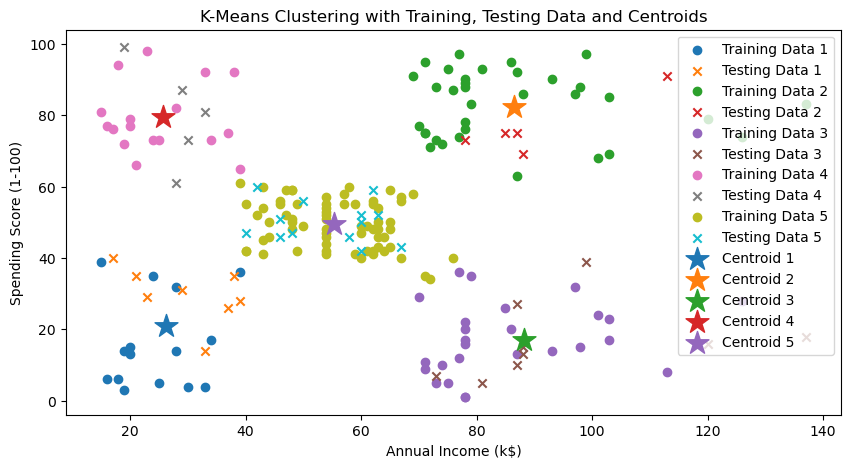

In [10]:
unique_clusters = np.unique(df['KMeans_Cluster'])

plt.figure(figsize=(10,5))

for i in unique_clusters:
    cluster_train_data = x_train[df.loc[x_train.index, 'KMeans_Cluster'] == i]
    plt.scatter(cluster_train_data['Annual Income (k$)'], cluster_train_data['Spending Score (1-100)'],label=f'Training Data {i + 1}')

    cluster_test_data = x_test[df.loc[x_test.index, 'KMeans_Cluster'] == i] 
    plt.scatter(cluster_test_data['Annual Income (k$)'], cluster_test_data['Spending Score (1-100)'],marker='x',label=f'Testing Data {i + 1}')
    
for i in unique_clusters:
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1],marker='*',s=300,label=f'Centroid {i + 1}')    
    
plt.title('K-Means Clustering with Training, Testing Data and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')   

plt.legend()



In [11]:
x = df.iloc[:, 3: 5].values
kf = KFold(n_splits=5,shuffle=True,random_state=42)
min_dist = []

for i,j in kf.split(x):
    x_train,x_test = x[i],x[j]
    
    kmeans = KMeans(n_clusters=5,random_state=42)
    kmeans.fit(x_train)
    
    predi = kmeans.predict(x_test)
    
    score = silhouette_score(x_test,predi)
    
    distances = np.linalg.norm(x_test - kmeans.cluster_centers_[predi],axis=1)
    
    min_dist.append(np.min(distances))
min_dist    

[3.1794011361862045,
 6.535043238070938,
 1.9682822328357406,
 1.609726949044481,
 3.0724040678674323]

In [12]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical.fit(x_train)

AgglomerativeClustering(n_clusters=5)

Text(0, 0.5, 'Distance')

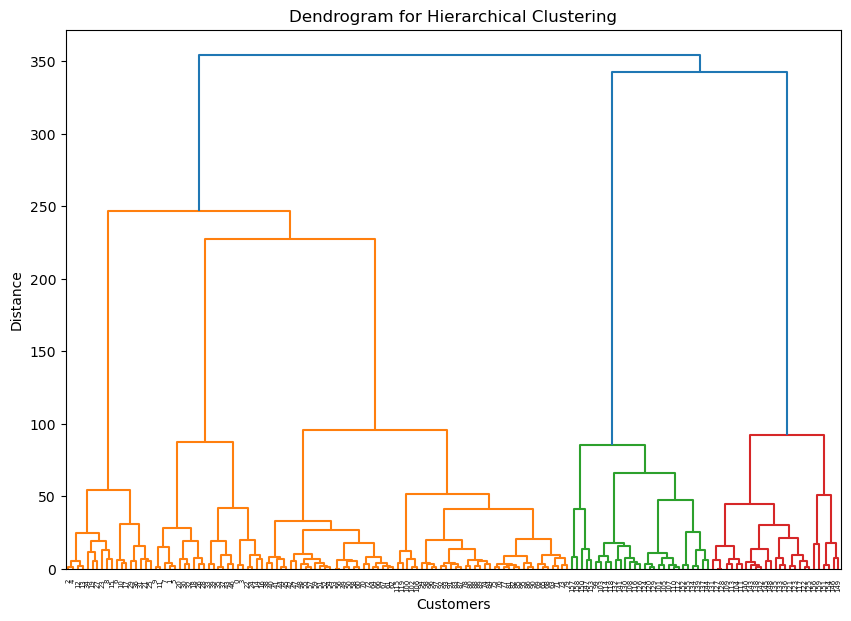

In [13]:
Z = linkage(x_train, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')